# Author: Shreya Nagar


# Task 2: Prediction using Unsupervised ML

- predict the optimum number of clusters  for 'iris' dataset 
- Represent it visually.

**Importing required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

**Load iris dataset**

In [2]:
iris=datasets.load_iris()
iris # is a dictionary comparising of- data,target_names,feature_names etc.

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

**Converting dataset to dataframe**

In [3]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Summarizing Data**

In [4]:
print(df.info())
print("\n\n")
print(df.describe())
print("\n\n")
print("Dimension of data: "+str(df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB
None



       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0

**Checking presence of null values in dataframe**

In [5]:
print("Total no. of NULL values in each column of dataframe:\n\n"+str(df.isnull().sum()))
#Dataframe doesn't contain NULL value.

Total no. of NULL values in each column of dataframe:

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


**Getting optimum number of cluster using "Elbow method"**

In [6]:
x=df.iloc[:,:].values
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    #Inertia(wcss- within-cluster sum-of-squares)
    #It is the sum of squared distances of samples to their closest cluster center.
    #Therefore the smaller the inertia the denser the cluster(closer together all the points are).
    wcss.append(kmeans.inertia_)


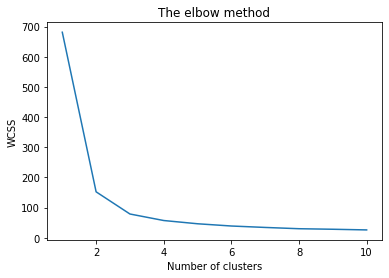

In [7]:
#Plotting the results onto a line graph

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

We have to select the value of k at the 'elbow' i.e the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

**Creating Kmeans model**

In [8]:
kmeans = KMeans(n_clusters = 3, random_state=0)
ypredicted = kmeans.fit_predict(x)
print("Prediction:\n"+str(ypredicted))
print("\n\nCentroid:\n"+str(kmeans.cluster_centers_))

Prediction:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Centroid:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


**Visualizing clusters on sepal length and sepal width**

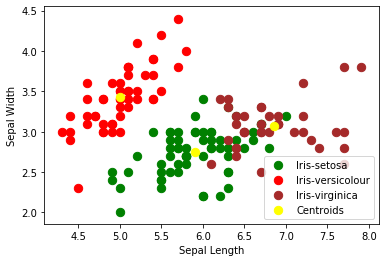

In [9]:
plt.scatter(x[ypredicted == 0, 0], x[ypredicted == 0, 1], s = 70, c = 'green', label = 'Iris-setosa')
plt.scatter(x[ypredicted == 1, 0], x[ypredicted == 1, 1], s = 70, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[ypredicted == 2, 0], x[ypredicted == 2, 1], s = 70, c = 'brown', label = 'Iris-virginica')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'yellow', label = 'Centroids')
plt.legend()

**Visualizing clusters on petal length and petal width**

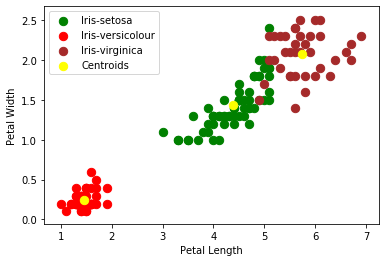

In [10]:
plt.scatter(x[ypredicted == 0, 2], x[ypredicted == 0, 3], s = 70, c = 'green', label = 'Iris-setosa')
plt.scatter(x[ypredicted == 1, 2], x[ypredicted == 1, 3], s = 70, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[ypredicted == 2, 2], x[ypredicted == 2, 3], s = 70, c = 'brown', label = 'Iris-virginica')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 70, c = 'yellow', label = 'Centroids')
plt.legend()